In [6]:
import os
import pandas as pd
from visualize import read_data
# Some short cells for analysing the results, used to write a 
# "paper" about this project.
RESULT_FOLDER = "medium-intersection_20_vehicles.hdf5-rsu_used_True-1681326993"

results_path = os.path.join("results", RESULT_FOLDER)
simulation_results_path = os.path.join(results_path, "results.json")
yolo_results_path = os.path.join(results_path, "yolo_results.json")

data_results, data_yolo = read_data(simulation_results_path, yolo_results_path)

print(data_results.keys())
print(len(data_yolo))

dict_keys(['agents', 'intersection_statuses'])
68869


In [11]:
# Get intersection congestion statuses at timesteps
df_intersec = pd.json_normalize(data_results['intersection_statuses'])

#print(df_intersections.head())

total = 1000
intersection_1_congested = 0
intersection_2_congested = 0

for timestep in range(0, total - 1):
    result = df_intersec.loc[df_intersec['timestep'] == timestep]
    first = result.loc[result['id'] == "intersection_1"].iloc[0]['status']
    second = result.loc[result['id'] == "intersection_2"].iloc[0]['status']
    if first == "congested":
        intersection_1_congested += 1
    if second == "congested":
        intersection_2_congested += 1

print(f"Intersection 1 was congested {intersection_1_congested} / {total} or")
print(f"\t {(intersection_1_congested/total)*100} %")
print(f"Intersection 2 was congested {intersection_2_congested} / {total} or")
print(f"\t {(intersection_2_congested/total)*100} %")


Intersection 1 was congested 999 / 1000 or
	 99.9 %
Intersection 2 was congested 95 / 1000 or
	 9.5 %


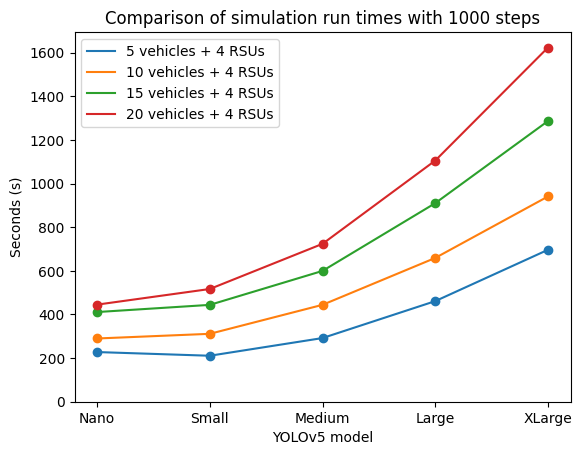

In [7]:
# Create graph of runtimes
import matplotlib.pyplot as plt

simulation_length = 1000
vehicle_count = 20
models = ["Nano", "Small", "Medium", "Large", "XLarge"]
runtimes_5 = [227.7,210.8,291.9,461.2,696.6] # seconds
runtimes_10 = [289.9,311.3,444.2,659.2,941.0] # seconds
runtimes_15 = [411.1,444.0,599.7,910.3,1286.8] # seconds
runtimes_20 = [445.1,516.8,723.8,1105.6,1623.8] # seconds

plt.title(f"Comparison of simulation run times with {simulation_length} steps")
plt.plot(models, runtimes_5)
plt.plot(models, runtimes_10)
plt.plot(models, runtimes_15)
plt.plot(models, runtimes_20)
plt.scatter(models, runtimes_5)
plt.scatter(models, runtimes_10)
plt.scatter(models, runtimes_15)
plt.scatter(models, runtimes_20)
plt.ylabel('Seconds (s)')
plt.xlabel('YOLOv5 model')
plt.legend(['5 vehicles + 4 RSUs', "10 vehicles + 4 RSUs", 
            '15 vehicles + 4 RSUs', "20 vehicles + 4 RSUs"])
plt.ylim(bottom=0)
plt.show()